# **EDA(Exploratory Data Analysis)**

- y = f(x)
- y: 모기 활동 지수
- x: 활동 지수에 영향을 주는 독립변수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/drive/MyDrive/mosquito_final_air_data.csv")

In [3]:
#그래프 확인하기
df.head()

,날짜,요일,평균 기온(℃),최저 기온(℃),최고 기온(℃),모기 활동 지수(서울시 평균),모기 발생 단계(서울시 평균),모기 발생 수준(서울시 평균),모기 발생 난이도(서울시 평균),모기 활동 지수(수변부),...,평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),평균 해면기압(hPa),합계 일사량(MJ/m2),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,2023-01-01,일,-0.2,-4.3,3.8,0.0,1단계,쾌적,하,0.0,...,54.5,3.3,1019.8,1030.8,10.81,57.0,49.0,0.024,0.6,0.004
1,2023-01-02,월,-4.5,-7.4,-0.4,0.0,1단계,쾌적,하,0.0,...,45.9,2.0,1021.0,1032.2,11.63,23.0,14.0,0.019,0.4,0.003
2,2023-01-03,화,-5.0,-9.0,0.6,0.0,1단계,쾌적,하,0.0,...,49.0,2.0,1019.5,1030.7,11.77,28.0,20.0,0.030,0.5,0.003
3,2023-01-04,수,-1.8,-5.7,3.3,0.0,1단계,쾌적,하,0.0,...,51.4,2.7,1019.5,1030.5,10.89,35.0,29.0,0.043,0.7,0.004
4,2023-01-05,목,-1.6,-5.6,3.6,0.0,1단계,쾌적,하,0.0,...,58.1,3.1,1019.6,1030.6,6.09,48.0,42.0,0.056,0.9,0.004


In [4]:
#분석에 필요없는 데이터 drop
df= df.drop(['모기 활동 지수(수변부)','모기 발생 단계(수변부)','모기 발생 수준(수변부)','모기 발생 난이도(수변부)',
 '모기 활동 지수(주거지)','모기 발생 단계(주거지)','모기 발생 수준(주거지)','모기 발생 난이도(주거지)',
 '모기 활동 지수(공원)','모기 발생 단계(공원)','모기 발생 수준(공원)','모기 발생 난이도(공원)',
 '포집량','모기','기타','모기 발생 단계(서울시 평균)','모기 발생 수준(서울시 평균)',
 '모기 발생 난이도(서울시 평균)','지점','지점명','Unnamed: 0'],axis=1)

In [5]:
df.keys()

Index(['날짜', '요일', '평균 기온(℃)', '최저 기온(℃)', '최고 기온(℃)', '모기 활동 지수(서울시 평균)',
       '평균 풍속(m/s)', '평균 전운량(1/10)', '평균 지면온도(°C)', '평균 5cm 지중온도(°C)',
       '0.5m 지중온도(°C)', 'Month', '일강수량(mm)', '평균 상대습도(%)', '평균 증기압(hPa)',
       '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일사량(MJ/m2)', '미세먼지(㎍/㎥)',
       '초미세먼지(㎍/㎥)', '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)'],
      dtype='object')

In [6]:
#컬럼명 수정
df.rename(columns={
 '날짜':'date',
 '요일':'day',
 '평균 기온(℃)':'AT', #Average temperature
 '최저 기온(℃)':'LT', #Lowest temperature
 '최고 기온(℃)':'MT', #Maximum temperature
 '모기 활동 지수(서울시 평균)':'MAI', #Mosquito activity index
 '평균 풍속(m/s)':'AWS', #average wind speed
 '평균 전운량(1/10)':'AOE', #Average amount of electricity
 '평균 지면온도(°C)':'AGT', #average ground temperature
 '평균 5cm 지중온도(°C)':'5UT',#5cm average underground temperature
 '0.5m 지중온도(°C)':'0.5UT',#0.5 m underground temperature
 'Month':'Month',
 '일강수량(mm)':'DP', #daily precipitation
 '평균 상대습도(%)':'ARH', #Average relative humidity
 '평균 증기압(hPa)':'AVP',#average vapor pressure
 '평균 현지기압(hPa)':'MLAP', #mean local atmospheric pressure
 '평균 해면기압(hPa)':'ASSP', #average sea surface pressure
 '합계 일사량(MJ/m2)':'TSR', #total solar radiation
 '미세먼지(㎍/㎥)':'FD',#Fine dust
 '초미세먼지(㎍/㎥)':'UFD', #Ultra fine dust
 '이산화질소농도(ppm)':'NDC', #Nitrogen dioxide concentration
 '일산화탄소농도(ppm)':'CMC', #carbon monoxide concentration
 '아황산가스농도(ppm)':'SDC'#Sulfur dioxide concentration
 },inplace=True)


변수의 의미
1. 날짜 = date
2. 요일 = day
3. 평균 기온(℃) = AT #Average temperature
4. 최저 기온(℃) = LT #Lowest temperature
5. 최고 기온(℃) = MT #Maximum temperature
6. 모기 활동 지수(서울시 평균) = MAI #Mosquito activity index
7. 평균 풍속(m/s) = AWS #average wind speed
8. 평균 전운량(1/10) = AOE #Average amount of electricity
9. 평균 지면온도(°C) = AGT #average ground temperature
10. 평균 5cm 지중온도(°C) = 5UT #5cm average underground temperature
11. 0.5m 지중온도(°C) = 0.5UT #0.5 m underground temperature
12. Month = Month
13. 일강수량(mm) = DP #daily precipitation
14. 평균 상대습도(%) = ARH#Average relative humidity
15. 평균 증기압(hPa) = AVP #average vapor pressure
16. 평균 현지기압(hPa) = MLAP #mean local atmospheric pressure
17. 평균 해면기압(hPa) = ASSP #average sea surface pressure
18. 합계 일사량(MJ/m2) = TSR #total solar radiation
19. 미세먼지(㎍/㎥) = FD #Fine dust
20. 초미세먼지(㎍/㎥) = UFD #Ultra fine dust
21. 이산화질소농도(ppm) = NDC #Nitrogen dioxide concentration
22. 일산화탄소농도(ppm) = CMC #carbon monoxide concentration
23. 아황산가스농도(ppm) = SDC #Sulfur dioxide concentration

In [7]:
sns.set_style('darkgrid')

In [8]:
### 데이터 셋 구조 보기
df.shape

(2552, 23)

In [9]:
#결측치 확인
df.isnull().sum()

,0
date,0
day,0
AT,0
LT,1
MT,1
MAI,0
AWS,0
AOE,0
AGT,0
5UT,0


In [10]:
#기온의 값은 기상청에서 찾은 값으로 채움
df['LT'] = df['LT'].fillna(27.2)
df['MT'] = df['MT'].fillna(23.4)

In [11]:
#대기 데이터의 null값은 많지 않으므로 dropna
df = df.dropna()
df.isnull().sum()

,0
date,0
day,0
AT,0
LT,0
MT,0
MAI,0
AWS,0
AOE,0
AGT,0
5UT,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2551
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2516 non-null   object 
 1   day     2516 non-null   object 
 2   AT      2516 non-null   float64
 3   LT      2516 non-null   float64
 4   MT      2516 non-null   float64
 5   MAI     2516 non-null   float64
 6   AWS     2516 non-null   float64
 7   AOE     2516 non-null   float64
 8   AGT     2516 non-null   float64
 9   5UT     2516 non-null   float64
 10  0.5UT   2516 non-null   float64
 11  Month   2516 non-null   int64  
 12  DP      2516 non-null   float64
 13  ARH     2516 non-null   float64
 14  AVP     2516 non-null   float64
 15  MLAP    2516 non-null   float64
 16  ASSP    2516 non-null   float64
 17  TSR     2516 non-null   float64
 18  FD      2516 non-null   float64
 19  UFD     2516 non-null   float64
 20  NDC     2516 non-null   float64
 21  CMC     2516 non-null   float64
 22  SDC  

In [13]:
df.describe()

,AT,LT,MT,MAI,AWS,AOE,AGT,5UT,0.5UT,Month,...,ARH,AVP,MLAP,ASSP,TSR,FD,UFD,NDC,CMC,SDC
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,...,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,13.062878,8.919992,17.950636,139.955763,2.180787,4.827822,15.108744,14.619606,14.899934,6.417727,...,60.874483,11.764348,1006.079849,1016.335334,13.879997,36.748013,21.835453,0.026719,0.459285,0.003853
std,10.705274,10.918036,10.767111,234.502050,0.679456,3.072265,11.560962,10.426249,8.916134,3.430420,...,14.951264,8.365855,8.017446,8.440601,7.154607,24.648029,15.089868,0.012364,0.176759,0.001396
min,-14.900000,-18.600000,-10.700000,0.000000,0.600000,0.000000,-9.300000,-6.500000,0.100000,1.000000,...,17.900000,0.700000,981.000000,990.800000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,0.000000,8.800000,5.500000,1.700000,2.100000,3.875000,4.500000,6.400000,3.750000,...,49.800000,4.600000,999.700000,1009.600000,8.347500,22.000000,12.000000,0.018000,0.300000,0.003000
50%,14.000000,9.300000,19.350000,32.900000,2.100000,4.900000,15.900000,15.500000,15.800000,6.000000,...,60.950000,9.400000,1006.200000,1016.400000,13.125000,33.000000,19.000000,0.025000,0.400000,0.004000
75%,22.400000,18.425000,27.300000,91.025000,2.500000,7.400000,25.300000,24.100000,23.300000,9.000000,...,71.000000,18.100000,1012.325000,1023.000000,19.230000,46.000000,28.000000,0.035000,0.500000,0.005000
max,33.700000,30.300000,39.600000,1000.000000,5.800000,10.000000,40.100000,34.100000,29.600000,12.000000,...,99.300000,33.500000,1026.800000,1038.100000,31.190000,434.000000,148.000000,0.077000,1.400000,0.011000


In [14]:
num_day=df['day'].unique()
print(len(num_day))
print(num_day)

7
['일' '월' '화' '수' '목' '금' '토']


In [15]:
#종속변수의 기초통계량
df['MAI'].describe()

,MAI
count,2516.000000
mean,139.955763
std,234.502050
min,0.000000
25%,5.500000
50%,32.900000
75%,91.025000
max,1000.000000


<Axes: >

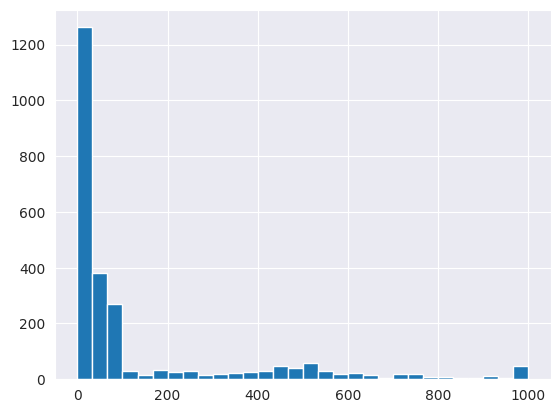

In [16]:
#히스토그램
df['MAI'].hist(bins=30)

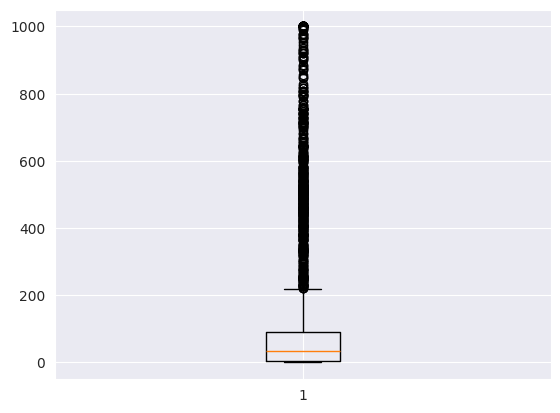

In [17]:
#boxplot
plt.boxplot(df['MAI'])
plt.show()

/tmp/ipython-input-1382389691.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


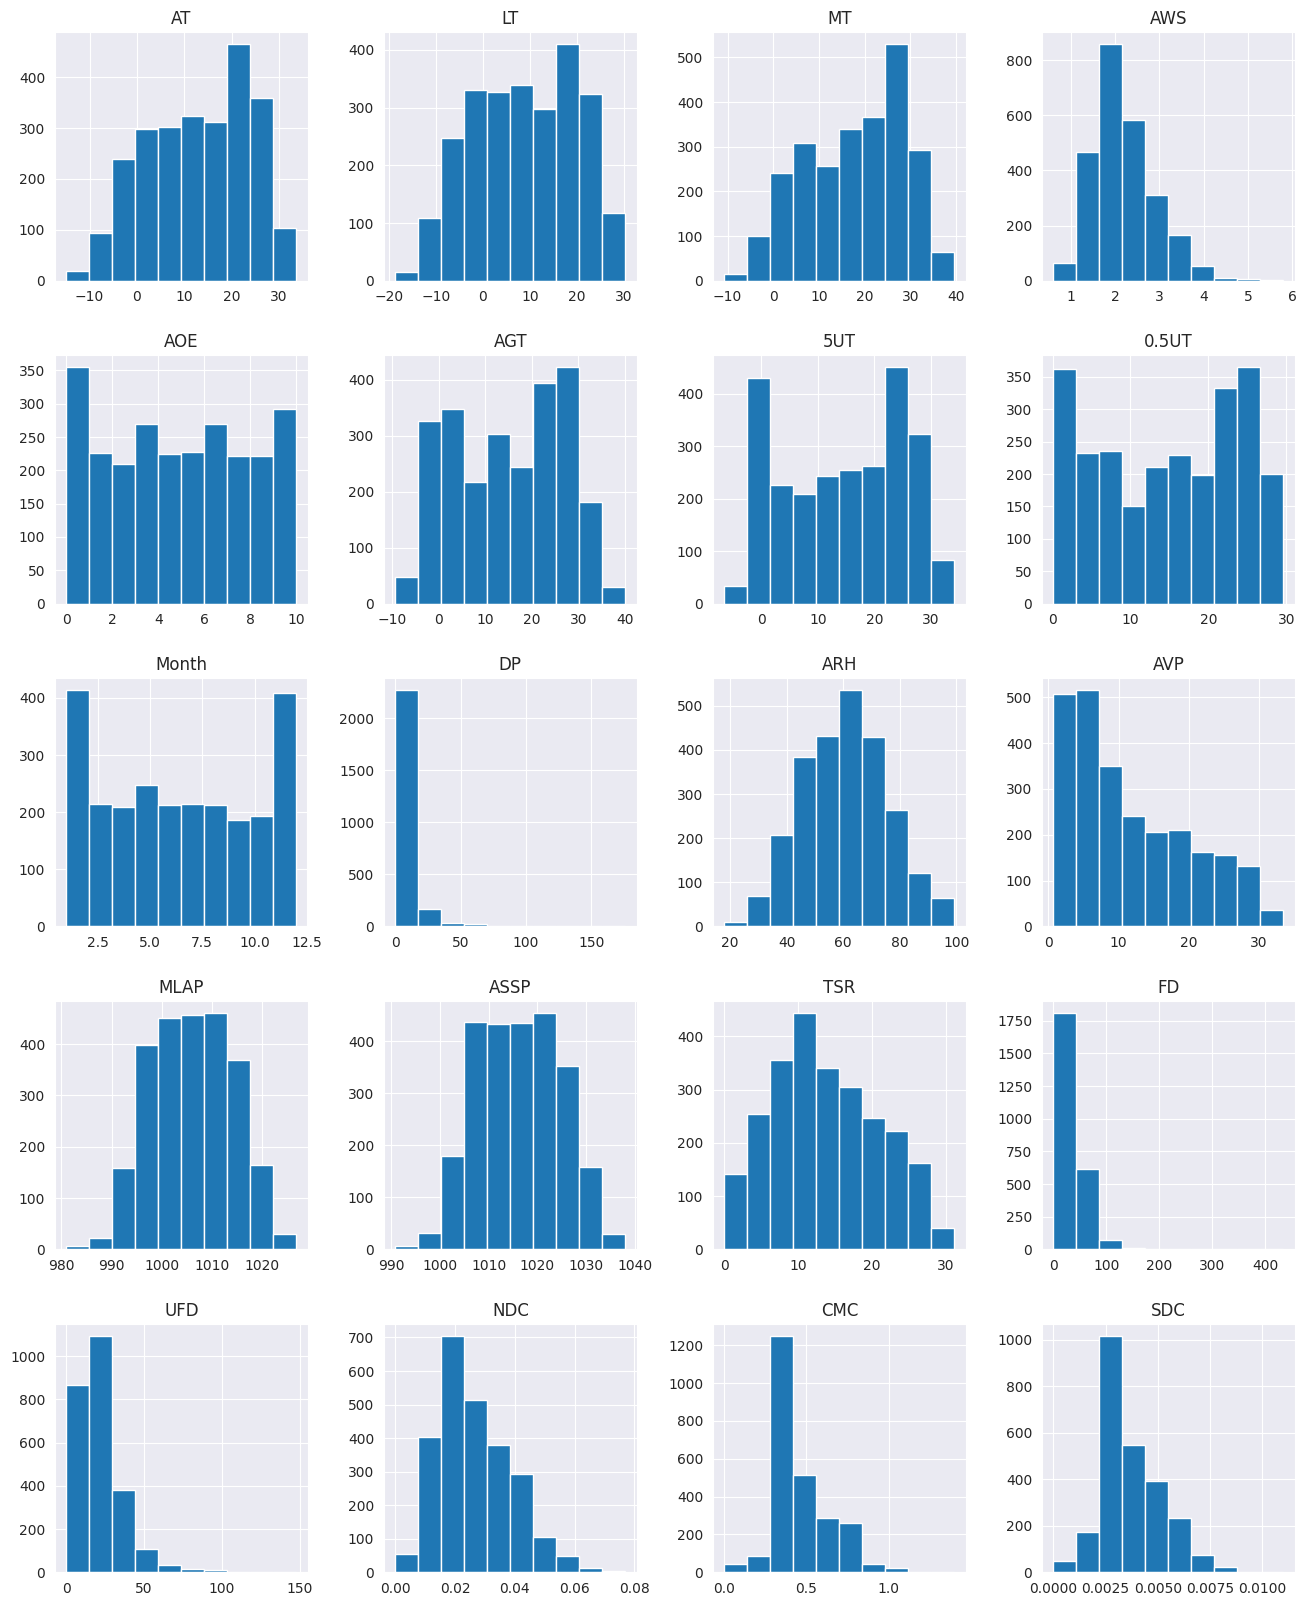

In [18]:
### numerical features(except "LON" & "LAT") : LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns = ['AT', 'LT', 'MT', 'AWS', 'AOE','AGT', '5UT', '0.5UT', 'Month', 'DP',
 'ARH', 'AVP', 'MLAP', 'ASSP','TSR','FD', 'UFD','NDC','CMC','SDC']
### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca() # Axes 생성
### gca()
### gca()로 현재의 Axes를, gcf()로 현재의 Figure 객체를 구할 수 있다.
df[numerical_columns].hist(ax=ax)
plt.show()

In [19]:
#Pearson 상관계수
cols = ['MAI','AT', 'LT', 'MT', 'AWS', 'AOE','AGT', '5UT', '0.5UT', 'Month', 'DP',
 'ARH', 'AVP', 'MLAP', 'ASSP','TSR','FD', 'UFD','NDC','CMC','SDC']
corr = df[cols].corr(method = 'pearson')
corr

,MAI,AT,LT,MT,AWS,AOE,AGT,5UT,0.5UT,Month,...,ARH,AVP,MLAP,ASSP,TSR,FD,UFD,NDC,CMC,SDC
MAI,1.000000,0.546646,0.546547,0.538952,-0.146255,0.182666,0.560832,0.566327,0.567212,0.132584,...,0.183366,0.519819,-0.455730,-0.464447,0.140786,-0.117509,-0.092913,-0.106954,-0.194535,0.109232
AT,0.546646,1.000000,0.989642,0.989338,-0.100569,0.309546,0.934423,0.938188,0.904918,0.168106,...,0.388723,0.855972,-0.769077,-0.785449,0.393440,-0.161232,-0.190810,-0.280455,-0.367418,-0.095759
LT,0.546547,0.989642,1.000000,0.962895,-0.090342,0.338762,0.926219,0.936342,0.908693,0.178754,...,0.423760,0.878480,-0.776445,-0.792222,0.352604,-0.174557,-0.200626,-0.296486,-0.373530,-0.106681
MT,0.538952,0.989338,0.962895,1.000000,-0.108161,0.272096,0.925798,0.923000,0.884056,0.149957,...,0.344955,0.817184,-0.746006,-0.762695,0.427466,-0.143247,-0.173691,-0.259646,-0.355361,-0.079297
AWS,-0.146255,-0.100569,-0.090342,-0.108161,1.000000,-0.053819,-0.091199,-0.081286,-0.080464,-0.116546,...,-0.042223,-0.116937,-0.099219,-0.088359,0.052268,-0.098060,-0.247565,-0.474965,-0.319781,-0.323864
AOE,0.182666,0.309546,0.338762,0.272096,-0.053819,1.000000,0.253476,0.300167,0.304955,0.056450,...,0.608685,0.453278,-0.424758,-0.424387,-0.493718,-0.111727,-0.044876,-0.038091,-0.054595,-0.079985
AGT,0.560832,0.934423,0.926219,0.925798,-0.091199,0.253476,1.000000,0.985936,0.936675,0.179485,...,0.331366,0.859135,-0.780581,-0.798399,0.493771,-0.168058,-0.199267,-0.290756,-0.390069,-0.064355
5UT,0.566327,0.938188,0.936342,0.923000,-0.081286,0.300167,0.985936,1.000000,0.975340,0.256015,...,0.393071,0.894185,-0.786548,-0.804105,0.407713,-0.209240,-0.246059,-0.319498,-0.408463,-0.094400
0.5UT,0.567212,0.904918,0.908693,0.884056,-0.080464,0.304955,0.936675,0.975340,1.000000,0.386667,...,0.418542,0.887775,-0.739415,-0.756665,0.306079,-0.271376,-0.316933,-0.343295,-0.420749,-0.131262
Month,0.132584,0.168106,0.178754,0.149957,-0.116546,0.056450,0.179485,0.256015,0.386667,1.000000,...,0.202761,0.234748,-0.016465,-0.026626,-0.176321,-0.155034,-0.200219,-0.013472,-0.007402,-0.058835


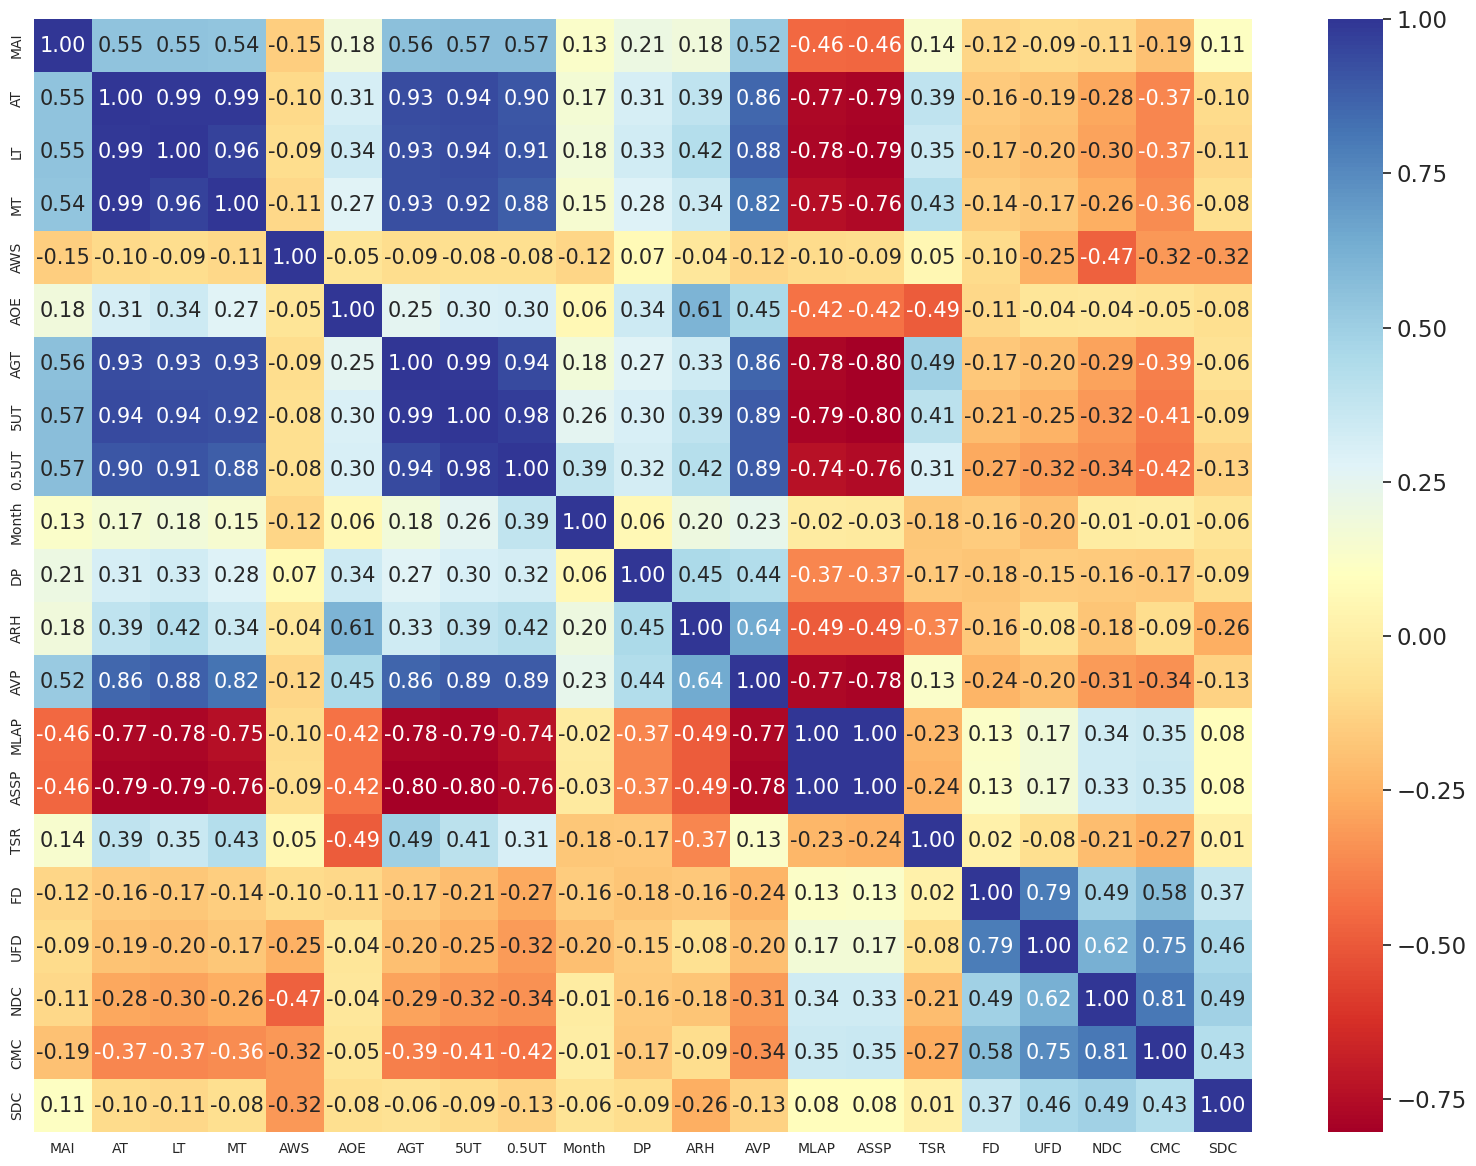

In [20]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()
sns.set(font_scale = 1.5) # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
 yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout() ## 여백을 조정합니다.
plt.show()

#### 0.7이상의 유의미한 값이 없음 0.5 이상의 변수들 확인
"MAI" - "모기활동지수”
“AT", "AGT" (양의 상관관계)
"MLAP" (음의 상관관게)
##### "AT","LT","MT" / "AGT","5UT", "0.5UT" / "MLAP","ASSP"는 서로의 상관관계도 높으므로 평균값만 확인해보기로함

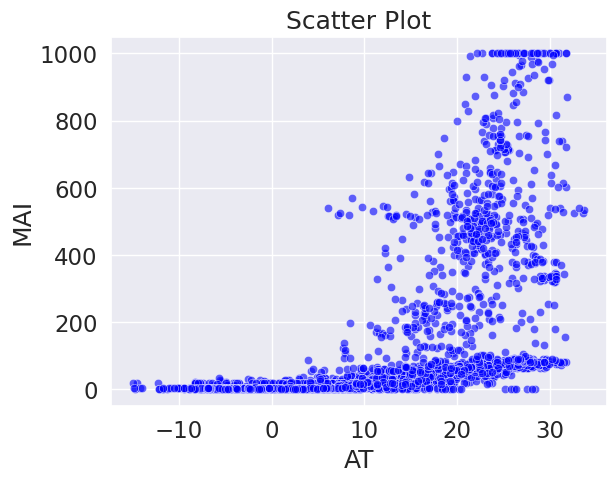

In [22]:
# scatter plot 산점도,
sns.scatterplot(data=df, x='AT', y='MAI', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

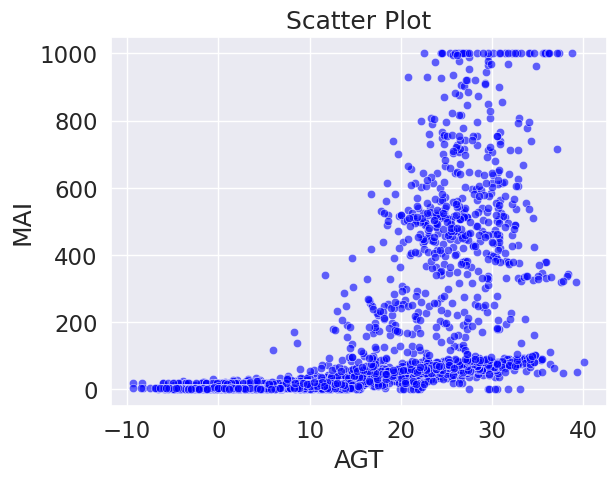

In [23]:
sns.scatterplot(data=df, x='AGT', y='MAI', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

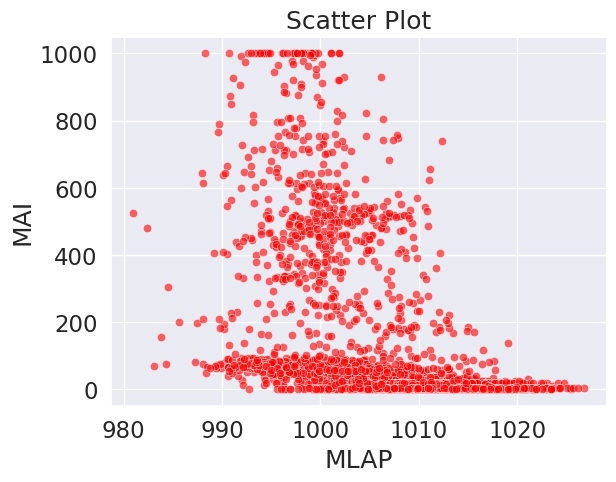

In [24]:
### scatter plot
sns.scatterplot(data=df, x='MLAP', y='MAI', markers='o', color='red', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [25]:
### 각 도시 데이터 갯수 살펴보기
df['day'].value_counts()

,count
day,
월,365
일,362
토,359
금,358
수,358
화,357
목,357


<Axes: xlabel='MAI', ylabel='day'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) mi

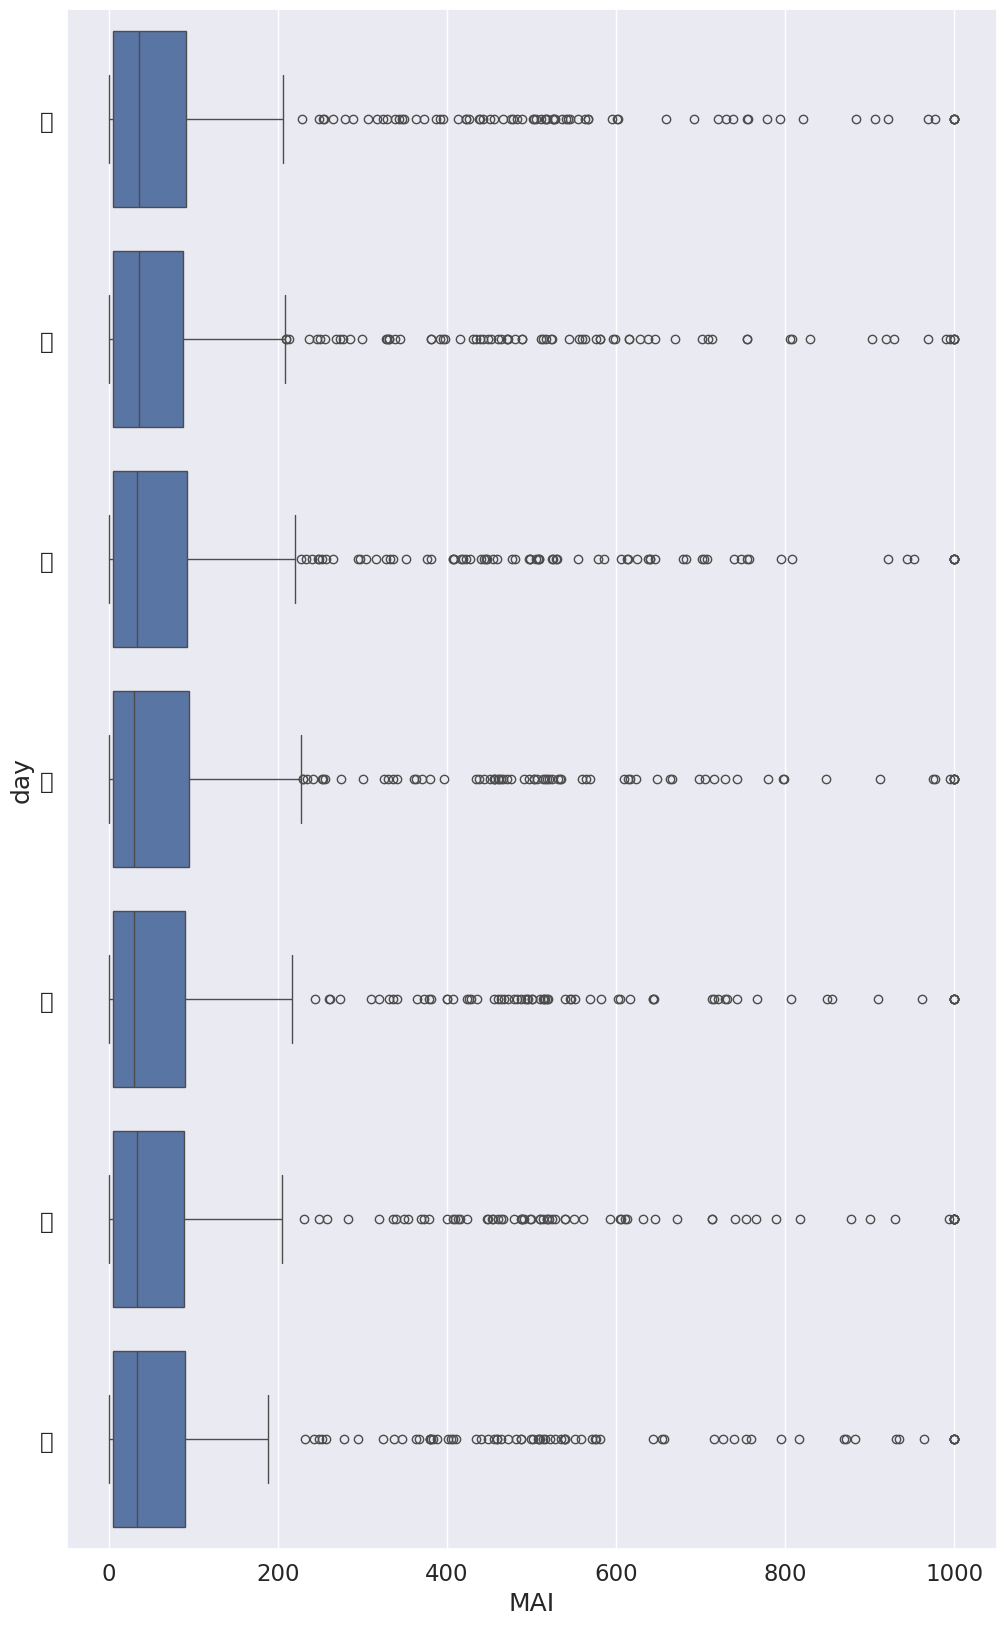

In [26]:
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='MAI', y='day', data=df)

요일별 모기 활동 지수는 큰 차이 없음

### 계절별 모기 활동 지수(서울시 평균) EDA

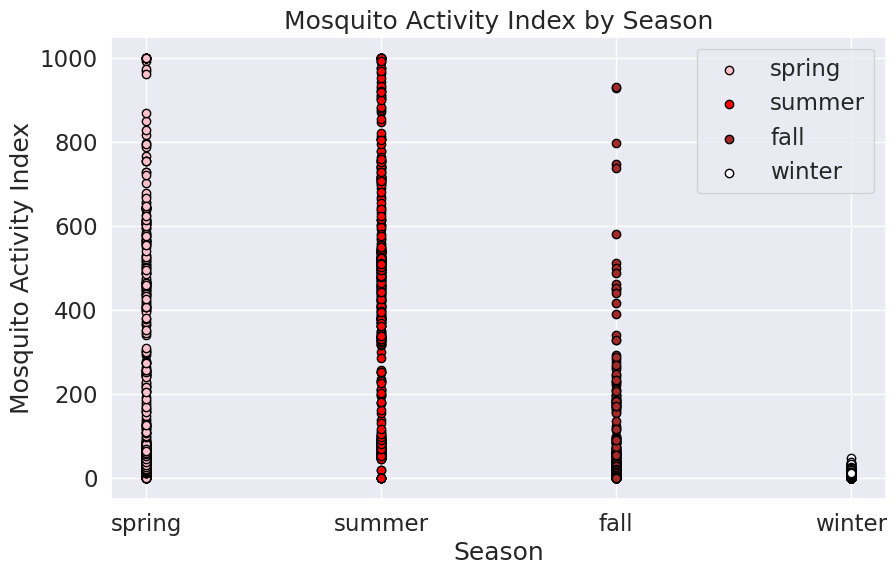

In [27]:
## 계절데이터로 변환
# 날짜 컬럼의 값을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])
# 계절 정보를 담을 새로운 컬럼 추가
df['season'] = pd.cut(df['date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['winter', 'spring', 'summer', 'fall'])
# 필요한 계절만 선택하여 데이터프레임 생성
selected_seasons = ['spring', 'summer', 'fall', 'winter']
df_selected = df[df['season'].isin(selected_seasons)]
# 계절별 산점도 그리기
colors = {'spring': 'pink', 'summer': 'red', 'fall': 'brown', 'winter': 'white'}
edge_color = 'black'
plt.figure(figsize=(10, 6))
for season, color in colors.items():
 df_season = df_selected[df_selected['season'] == season]
 plt.scatter(df_season['season'], df_season['MAI'], color=color, edgecolors=edge_color, label=season)
plt.title('Mosquito Activity Index by Season')
plt.xlabel('Season')
plt.ylabel('Mosquito Activity Index')
plt.legend()
plt.show()

### 계절별 0.5 온도 EDA

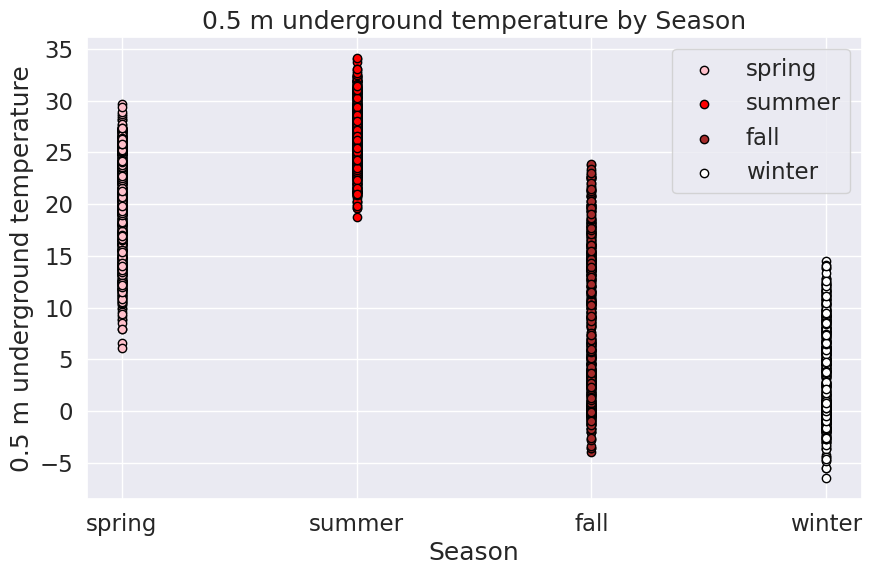

In [28]:
## 계절데이터로 변환
# 날짜 컬럼의 값을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])
# 계절 정보를 담을 새로운 컬럼 추가
df['season'] = pd.cut(df['date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['winter', 'spring', 'summer', 'fall'])
# 필요한 계절만 선택하여 데이터프레임 생성
selected_seasons = ['spring', 'summer', 'fall', 'winter']
df_selected = df[df['season'].isin(selected_seasons)]
edge_color = 'black'
plt.figure(figsize=(10, 6))
for season, color in colors.items():
 df_season = df_selected[df_selected['season'] == season]
 plt.scatter(df_season['season'], df_season['5UT'], color=color, edgecolors=edge_color, label=season)
plt.title('0.5 m underground temperature by Season')
plt.xlabel('Season')
plt.ylabel('0.5 m underground temperature')
plt.legend()
plt.show()
